In [67]:
# Importing all the necessary modules used in this EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [6]:
#### load the Penguin dataset and create their dataframes
penguin_df = pd.read_csv("penguins_lter.csv")
penguin_df.head(15)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,11/15/07,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
8,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,11/9/07,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
9,PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,11/9/07,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,No blood sample obtained for sexing.


### Data Cleansing
#### Clean the data. Identify columns that are redundant or unnecessary.

For the purpose of this data analysis I am going to drop these columns: Region, Stage, Individual ID, Clutch completion, Delta 15 N (o/oo), Delta 13 C (o/oo) and Comments

In the next step, we will use describe and info methods to get some more information about the data and before cleaning it

In [7]:
# For the purpose of this data analysis I am going to drop these columns: Region, Stage, Individual ID, Clutch completion, 
# Delta 15 N (o/oo), Delta 13 C (o/oo) and Comments
# Dropping columns
penguin_df.drop(labels = ['Region', 'Stage', 'Individual ID', 'Clutch Completion', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'], axis = 1, inplace=True)
penguin_df.head(15)

,studyName,Sample Number,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/11/07,39.1,18.7,181.0,3750.0,MALE
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/11/07,39.5,17.4,186.0,3800.0,FEMALE
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/16/07,40.3,18.0,195.0,3250.0,FEMALE
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/16/07,NaN,NaN,NaN,NaN,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/16/07,36.7,19.3,193.0,3450.0,FEMALE
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/16/07,39.3,20.6,190.0,3650.0,MALE
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/15/07,38.9,17.8,181.0,3625.0,FEMALE
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/15/07,39.2,19.6,195.0,4675.0,MALE
8,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/9/07,34.1,18.1,193.0,3475.0,NaN
9,PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/9/07,42.0,20.2,190.0,4250.0,NaN


### Knowing the Dataset
#### Describe and Info methods

The describe method gives us very useful insight in terms of non-null value counts for each column, mean of all numeric columns, as well as min / max of each column

Info method on the other hand gives us useful information on non-null values and datatype of each column. We can clearly see that there are only a handful null values in our dataset. Hence we will aim to drop these values

In [8]:
print(penguin_df.describe())
print(penguin_df.info())

       Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
count     344.000000          342.000000         342.000000   
mean       63.151163           43.921930          17.151170   
std        40.430199            5.459584           1.974793   
min         1.000000           32.100000          13.100000   
25%        29.000000           39.225000          15.600000   
50%        58.000000           44.450000          17.300000   
75%        95.250000           48.500000          18.700000   
max       152.000000           59.600000          21.500000   

       Flipper Length (mm)  Body Mass (g)  
count           342.000000     342.000000  
mean            200.915205    4201.754386  
std              14.061714     801.954536  
min             172.000000    2700.000000  
25%             190.000000    3550.000000  
50%             197.000000    4050.000000  
75%             213.000000    4750.000000  
max             231.000000    6300.000000  
<class 'pandas.core.frame.DataFrame'

### Drop the null values

Dropping the rows with null values

In [9]:
# Dropping null values
penguin_df.dropna(inplace = True)

In [10]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            334 non-null    object 
 1   Sample Number        334 non-null    int64  
 2   Species              334 non-null    object 
 3   Island               334 non-null    object 
 4   Date Egg             334 non-null    object 
 5   Culmen Length (mm)   334 non-null    float64
 6   Culmen Depth (mm)    334 non-null    float64
 7   Flipper Length (mm)  334 non-null    float64
 8   Body Mass (g)        334 non-null    float64
 9   Sex                  334 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 28.7+ KB


### Remove any Duplicate rows

It shows there are no duplicate rows found

In [11]:
penguin_df.drop_duplicates(inplace=True)

In [12]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            334 non-null    object 
 1   Sample Number        334 non-null    int64  
 2   Species              334 non-null    object 
 3   Island               334 non-null    object 
 4   Date Egg             334 non-null    object 
 5   Culmen Length (mm)   334 non-null    float64
 6   Culmen Depth (mm)    334 non-null    float64
 7   Flipper Length (mm)  334 non-null    float64
 8   Body Mass (g)        334 non-null    float64
 9   Sex                  334 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 28.7+ KB


# Readability
For easiness with reading, I have replaced the long names of Species with short name like 'Adelie', 'Chinstrap' etc

In [31]:
penguin_df.replace('Adelie Penguin (Pygoscelis adeliae)', 'Adelie', inplace=True)
penguin_df.replace('Chinstrap penguin (Pygoscelis antarctica)', 'Chinstrap', inplace=True)
penguin_df.replace('Gentoo penguin (Pygoscelis papua)', 'Gentoo', inplace=True)
penguin_df.head()

,studyName,Sample Number,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,PAL0708,1,Adelie,Torgersen,11/11/07,39.1,18.7,181.0,3750.0,MALE
1,PAL0708,2,Adelie,Torgersen,11/11/07,39.5,17.4,186.0,3800.0,FEMALE
2,PAL0708,3,Adelie,Torgersen,11/16/07,40.3,18.0,195.0,3250.0,FEMALE
4,PAL0708,5,Adelie,Torgersen,11/16/07,36.7,19.3,193.0,3450.0,FEMALE
5,PAL0708,6,Adelie,Torgersen,11/16/07,39.3,20.6,190.0,3650.0,MALE


# Analysis 1
## Volume Analysis
The piecharts below show:
1. Adelie Penguin has the highest records in the dataset with 43.7% where as Chinstrap penguin have the lowest records
2. The highest penguin dataset is taken from Biscoe island with 49% where as Torgersen has the lowest dataset 14.1%

array([<AxesSubplot:ylabel='Island'>], dtype=object)

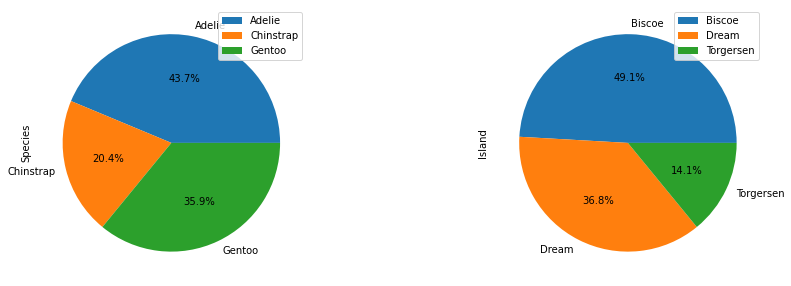

In [27]:
# piechart for penguin poulation for Species and Island
# Species
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))

# Data preparation for the piegraph - groupby, taking the count and then plotting the species
groupby_species = penguin_df.groupby(by=['Species'])
species_count = groupby_species['Species'].count()
species_count.plot.pie(autopct = '%1.1f%%', subplots=True,figsize=(10, 10), legend = True, ax = axes[0])

# Data preparation for the piegraph - groupby, taking the count and then plotting the island
groupby_island = penguin_df.groupby(by=['Island'])
island_count = groupby_island['Island'].count()
island_count.plot.pie(autopct = '%1.1f%%', subplots=True,figsize=(10, 10), legend = True, ax = axes[1])



# Analysis 2
## Facetgrid - Culment Depth vs Culmen Length By Species
Below facetgrid shows the culmen depth and length analysis for each type of the Species.
1. It shows that Adelie penguins have got the maximum culmen but they seem to have the least culmen length
2. Gentoo penguins seem to have a the least culmen depth but have good culmen length
3. Chinstrap have got a good average culmen length as well as depth

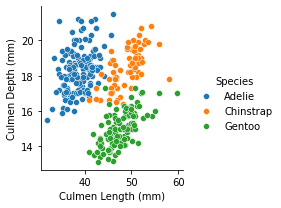

In [33]:
# Facetgrid analysis for Culment Depth vs Culmen Length By Species
# Plotting Species together on a same data gives you clear comparision
fg = sns.FacetGrid(penguin_df, hue = 'Species', margin_titles=True)
# Culment Depth vs Culmen Length By Species
fg.map(sns.scatterplot, "Culmen Length (mm)", "Culmen Depth (mm)")
fg.add_legend()
plt.show()
plt.close()

# Analysis 3
## Facetgrid - Body Mass vs Flipper Length by Species
Please refer to the below facetgrid analysis:
1. It shows Gentoo penguins have got the highest Body mass as well as flipper lengths
2. Chinstrap and Adelie penguins have got almost the same body mass and flipper lengths

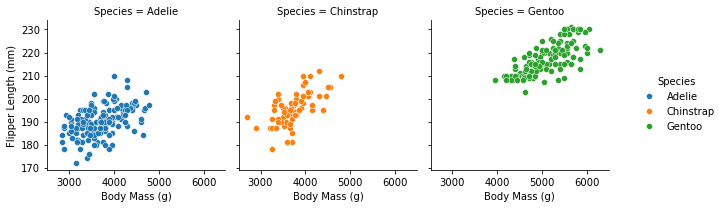

In [43]:
# Facetgrid analysis for Body Mass vs Flipper Length by Species
# Selecting columns and hue
fg = sns.FacetGrid(penguin_df, col = 'Species', hue = 'Species', margin_titles=True)
# Body Mass vs Flipper Length by Species
fg.map(sns.scatterplot, "Body Mass (g)", "Flipper Length (mm)")
fg.add_legend()
plt.show()
plt.close()

# Analysis 4
## Facetgrid - Flipper length and BMI analysis by Species and Sex

Male penguins generally have got longer flippers and higher BMIs. This is true across all three species

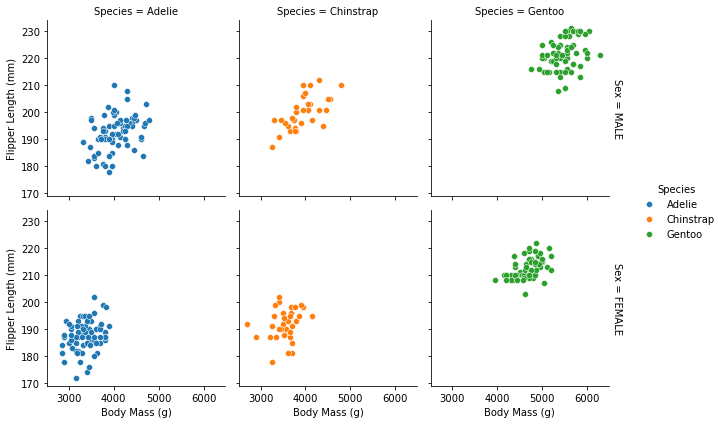

In [39]:
# Facetgrid analysis for Body Mass vs Flipper Length by Species
# dropping the row where the Sex value is a '.'
penguin_df.drop(penguin_df[penguin_df['Sex']== '.'].index, inplace=True  )

# Selecting columns and hue to facetgrid
fg = sns.FacetGrid(penguin_df, row = 'Sex', col = 'Species', hue = 'Species', margin_titles=True)
# Body Mass vs Flipper Length by Species
fg.map(sns.scatterplot, "Body Mass (g)", "Flipper Length (mm)")
fg.add_legend()
plt.show()
plt.close()

# Analysis 5
## Histplot analysis for Flipper Length by Species
The histplot below shows:
1. Majority of the Adelie penguins have flipper lengths between 180-200mm
2. Majority of the Chinstrap penguins have flippe lengths between 190 and 200mm
3. The Gentoo penguins have got the longest flippers with majority of them peaking beween 205 and 225mm

Text(0.5, 1.0, 'Flipper Length')

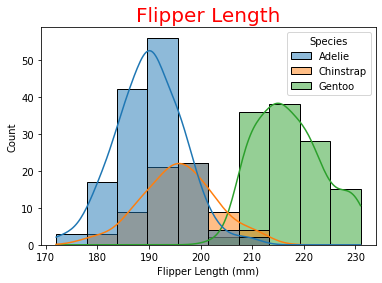

In [45]:
# Flipper length analysis by Species
# Flipper length on x-axis and count on y-axis
sns.histplot(x = "Flipper Length (mm)", data = penguin_df, kde=True, hue = "Species")
plt.title("Flipper Length", size=20, color="red")

# Analysis 6
## Heatmap
Please refer to the heatmap depicting the correlation between the numeric features
1. Culmen length and depth have got weak to moderate correlation meaning when one goes up the other one reduces
2. Flipper length and Culmen Length have got strong positive correlation, meaning when flipper lengths go up the culmen lengths also go up.
3. Body Mass has got moderate to strong positive correlation with Culmen length but a moderate correlation with Culmen width.

<AxesSubplot:>

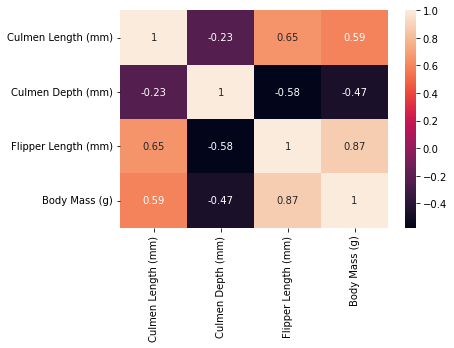

In [48]:
# Heatmap on Penguin Data

# Preparing the list of features for Heatmap
penguin_hmap_data = penguin_df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
# Plotting the Heatmap
sns.heatmap(penguin_hmap_data.corr(), annot = True)

# Analysis 7
## lmplot between Culmen Length and Depth per Species
Looking at the below lmplot, we can see the following:
1. Male have generally got longer and deeper culmen compared to their counter parts female pengune across all the penguins
2. Chinstrap and Gentoo penguins have got weak to moderate correlation between culmen length and depth in both the genders.
3. Adelie Female penguins have weak to moderate correlation between culment length and depth where as their male counter parts we cannot say the same

<Figure size 720x720 with 0 Axes>

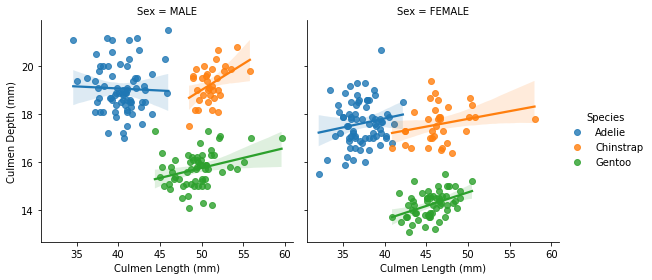

In [55]:
# lmplot between Culmen Length and Depth per Species
plt.figure(figsize=(10,10))

# Keying in the x,y-axis as well as hue and column data for lmplot
sns.lmplot(
    data=penguin_df, x="Culmen Length (mm)", y="Culmen Depth (mm)",
    hue="Species", col="Sex", height=4,
)

# Analysis 8
## Boxplot on Flipper Lengths per Species
The below barplot gives us fair idea of the flipper lengths across the three penguin species. e.g. The Flipper lengths for Adelie are: Min - 175mm, Max - 208mm and Mean - 190mm. Similarly, we have derive the numbers for other species as well.

Text(0.5, 1.0, 'Flipper Lengths Analysis by Species')

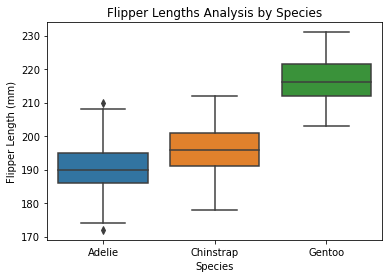

In [66]:
#Flipper Lengths Analysis by Species
# Preparing data for box plot and plotting it on chart
sns.boxplot(x = "Species", y = "Flipper Length (mm)", data =penguin_df)
plt.title("Flipper Lengths Analysis by Species")

# Analysis 9
## WordCloud for Species and Island names
Using the external library for plotting WordCloud. In this example I have used the names of the species and also Island

['Adelie', 'Chinstrap', 'Gentoo', 'Torgersen', 'Biscoe', 'Dream']


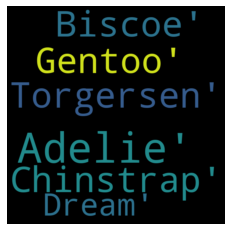

In [75]:
#Create text using the DataFrame columns Species & Island and taking only values from these
text1 = penguin_df['Species'].values
text2 = penguin_df['Island'].values
# Initialize the empty list
unique_text = []
# Generate the list of unique values from Species
for i in text1:
    if i not in unique_text:
        unique_text.append(i)
# Generate the list of unique values from Island
for j in text2:
    if j not in unique_text:
        unique_text.append(j)
print(unique_text)

#Create visualisation
# Convert the text to string for the WordCloud processing
wordcloud = WordCloud(width = 800, height = 800, margin = 10).generate(str(unique_text))
# plotting it on the graph
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()